<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
        <img src="../figs/uoc_masterbrand_3linies_positiu.png", align="left">
    </div>
    <div style="float: right; width: 50%;">
        <p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
        <p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
        <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
    </div>
</div>
<div style="width:100%;">&nbsp;</div>

# Ejemplo de reducción de dimensionalidad con PCA y LDA

## 1. Carga del conjunto de datos

En primer lugar, cargaremos el conjunto de datos IRIS dataset (más información en https://archive.ics.uci.edu/ml/datasets/iris). Este se puede descargar de Internet o puede cargarse directamente de la librería `scikit-learn`, que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y *machine learning*.

In [1]:
from sklearn import datasets

### Loading the Dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

## 2. Análisis exploratorio de los datos

Utilizando una librería gráfica, como por ejemplo `matplotlib`, realizaremos un gráfico del histograma de valores para cada uno de los atributos, separados por los valores de clase. La finalidad es observar cómo se distribuye cada uno de los atributos en función del valor de clase que toman, para poder identificar de forma visual y rápida si algunos atributos permiten diferenciar claramente las distintas clases que forman este conjunto de datos.

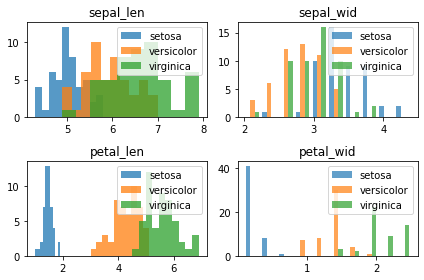

In [3]:
import matplotlib.pyplot as plt

### Exploratory Visualization
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

# sepal_len
for i, key in zip([0,1,2], target_names):
    ax0.hist(X[y==i, 0], alpha=0.75, label=key)
ax0.set_title('sepal_len')
ax0.legend(loc='upper right')

# sepal_wid
arr = []
for i in [0,1,2]:
    arr.append(X[y==i, 1])
ax1.hist(arr, alpha=0.7, label=target_names)
ax1.set_title('sepal_wid')
ax1.legend(loc='upper right')

# petal_len
for i,key in zip([0,1,2], target_names):
    ax2.hist(X[y==i, 2], alpha=0.75, label=key)

ax2.set_title('petal_len')
ax2.legend(loc='upper right')

# petal_wid
arr = []
for i in [0,1,2]:
    arr.append(X[y==i, 3])
ax3.hist(arr, alpha=0.7, label=target_names)
ax3.set_title('petal_wid')
ax3.legend(loc='upper right')

fig.tight_layout()
plt.show()

## 3. Reducción de dimensionalidad

En esta sección aplicaremos dos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con 2 dimensiones (en lugar de las 4 que tiene el conjunto original).

Podemos aplicar, entre otros:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)

No es necesario programar los algoritmos. En este caso, haremos uso de las implementaciones disponibles en la librería `scikit-learn`.

Generaremos un gráfico (en 2D) con el resultado de cada uno de los métodos de reducción de la dimensión, con el objetivo de visualizar si es posible separar eficientemente las clases objetivo empleando estos métodos de reducción de dimensionalidad.

explained variance ratio (first two components): [0.92461872 0.05306648]


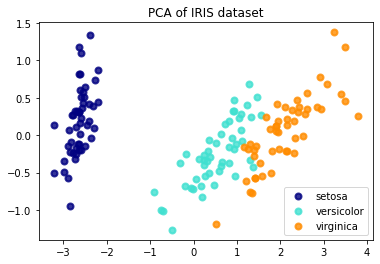

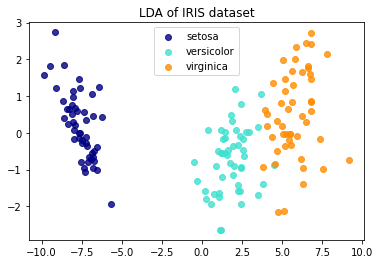

In [4]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()